In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp
import category_encoders as ce
%matplotlib inline

Lendo o DataFrame, organizando as colunas e separando as bases de teste e treino

In [2]:
#Lendo o dataframe e separando as colunas

car = pd.read_csv("car_evaluation.csv", header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car.columns = col_names

X = car.drop(['class'], axis=1).copy()
y = car['class'].copy()

#Separação do dataframe em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#Transformação das variáveis em contínuas e não mais em categóricas
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Treinando a primeira arvore sem nenhum argumento

In [3]:
#Criação do primeiro modelo de arvore de decisão, sem nenhum tunning
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Acurácia do modelo: {round(score *100, 2)}%")

Acurácia do modelo: 93.87%


### Tunning do modelo

In [35]:
#Encontrando os CCP_ALPHAS

resultados = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = resultados['ccp_alphas'], resultados['impurities']


clfs = []
n = 1
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=n)
    clf.fit(X_train, y_train)
    #Predicted values

    predict_values = clf.predict(X_test)
    score = accuracy_score(y_test, predict_values)
    print(f"Acurácia dos modelos: {round(score * 100, 2)}%, com o max_deth = {n}")
    
    clfs.append(clf)

    n += 1

print('\n')
print(f"Número de nós da última arvore é {clfs[-1].tree_.node_count} com ccp_alpha de {ccp_alphas[-1]}")

Acurácia dos modelos: 69.7%, com o max_deth = 1
Acurácia dos modelos: 77.06%, com o max_deth = 2
Acurácia dos modelos: 80.91%, com o max_deth = 3
Acurácia dos modelos: 80.04%, com o max_deth = 4
Acurácia dos modelos: 83.01%, com o max_deth = 5
Acurácia dos modelos: 87.92%, com o max_deth = 6
Acurácia dos modelos: 88.44%, com o max_deth = 7
Acurácia dos modelos: 93.17%, com o max_deth = 8
Acurácia dos modelos: 93.35%, com o max_deth = 9
Acurácia dos modelos: 95.1%, com o max_deth = 10
Acurácia dos modelos: 95.1%, com o max_deth = 11
Acurácia dos modelos: 95.45%, com o max_deth = 12
Acurácia dos modelos: 95.1%, com o max_deth = 13
Acurácia dos modelos: 95.1%, com o max_deth = 14
Acurácia dos modelos: 95.27%, com o max_deth = 15
Acurácia dos modelos: 95.45%, com o max_deth = 16
Acurácia dos modelos: 95.62%, com o max_deth = 17
Acurácia dos modelos: 94.75%, com o max_deth = 18
Acurácia dos modelos: 94.92%, com o max_deth = 19
Acurácia dos modelos: 95.1%, com o max_deth = 20
Acurácia dos mo

Puxando o menor ccp para usarmos em nossa arvore

In [5]:
ccp_alphas_filtered = ccp_alphas[ccp_alphas != 0]
ccp_min = ccp_alphas_filtered[impurities[ccp_alphas != 0].argmin()]

Treinando o modelo novamente

In [31]:
#Rodando o modelo com o ccp_alpha mínimo

clf = DecisionTreeClassifier(max_depth=10, ccp_alpha=ccp_min, min_samples_split=2)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

Resultado final

In [32]:
score = accuracy_score(y_test, predict)
print(f"Acurácia do modelo: {round(score * 100, 2)}%")

Acurácia do modelo: 95.1%


Valores a serem preditos: 'unacc', 'acc', 'vgood', 'good'

Matrix de confusão

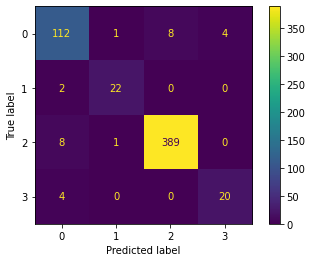

Acurácia DecisionTreeClassifier: 95.1%


In [33]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(f"Acurácia DecisionTreeClassifier: {(accuracy_score(y_test, predict) * 100).round(2)}%")